<a href="https://colab.research.google.com/github/Gaukhar-ai/for_my_Thinkful_work/blob/master/Copy_of_Time_Series_Analysis_Decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/drive/My Drive/DSI Month 4/Week 12/Datasets/AAPL.csv')

In [ ]:
df.head()

,Date,Close,Volume,Open,High,Low
0,2010-06-03,37.5886,162341809,37.8828,37.9357,37.2014
1,2010-06-04,36.5664,189045767,36.8871,37.4143,36.3757
2,2010-06-07,35.8486,221253336,36.8986,37.0214,35.7928
3,2010-06-08,35.6186,249904415,36.1771,36.2571,35.0928
4,2010-06-09,34.7428,213040094,35.9243,35.9857,34.6414


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df[['Date', 'Close']]

In [ ]:
df.head()

,Date,Close
0,2010-06-03,37.5886
1,2010-06-04,36.5664
2,2010-06-07,35.8486
3,2010-06-08,35.6186
4,2010-06-09,34.7428


In [ ]:
def ilinechart(df, x, y, groups=None, title=''):
    fig = px.line(df, x=x, y=y, color=groups, title=title, 
                  template='none').update(layout=dict(title=dict(x=0.5)))

    fig.show()

In [ ]:
ilinechart(df, 'Date', 'Close', title='AAPL Closing Prices')

In [ ]:
series = df.set_index('Date')
series

,Close
Date,
2010-06-03,37.5886
2010-06-04,36.5664
2010-06-07,35.8486
2010-06-08,35.6186
2010-06-09,34.7428
...,...
2020-05-27,318.1100
2020-05-28,318.2500
2020-05-29,317.9400


In [ ]:
decomposition = sm.tsa.seasonal_decompose(series, model='additive', freq=252)

trend = decomposition.trend.reset_index()
seasonality = decomposition.seasonal.reset_index()
residuals = decomposition.resid.reset_index()

merged = df.merge(trend, on='Date')
merged = merged.merge(seasonality, on='Date')
merged = merged.merge(residuals, on='Date')
merged.columns = ['Date', 'Observed', 'Trend', 'Seasonality', 'Residuals']
merged.head()

,Date,Observed,Trend,Seasonality,Residuals
0,2010-06-03,37.5886,NaN,0.966307,NaN
1,2010-06-04,36.5664,NaN,1.008828,NaN
2,2010-06-07,35.8486,NaN,0.976376,NaN
3,2010-06-08,35.6186,NaN,0.387145,NaN
4,2010-06-09,34.7428,NaN,-0.174811,NaN


In [ ]:
melted = pd.melt(merged, id_vars='Date', value_vars=['Observed', 'Trend', 'Seasonality', 'Residuals'])

melted.head()

,Date,variable,value
0,2010-06-03,Observed,37.5886
1,2010-06-04,Observed,36.5664
2,2010-06-07,Observed,35.8486
3,2010-06-08,Observed,35.6186
4,2010-06-09,Observed,34.7428


In [ ]:
# Observed = Trend + Seasonality + Residuals
ilinechart(melted, 'Date', 'value', groups='variable', title='Observed vs. Components')

In [ ]:
merged['Rolling_Mean'] = merged['Observed'].rolling(window=252).mean()
merged['Rolling_Std'] = merged['Observed'].rolling(window=252).std()

In [ ]:
melted = pd.melt(merged, id_vars='Date', value_vars=['Observed', 'Rolling_Mean', 'Rolling_Std'], 
                 var_name='Variable', value_name='Value')

ilinechart(melted, 'Date', 'Value', groups='Variable', title='Rolling Mean & Standard Deviation')

In [ ]:
adf_test = sm.tsa.stattools.adfuller(merged['Observed'])

results = pd.Series(adf_test[0:4], index=['ADF Test Statistic', 'P-Value', '# of Lags Used', '# of Observations Used'])

for key, value in adf_test[4].items():
  results[f'Critical Value {key}'] = value

print('Augmented Dickey-Fuller Test Results:\n')
print(results)

Augmented Dickey-Fuller Test Results:

ADF Test Statistic           0.635207
P-Value                      0.988452
# of Lags Used              26.000000
# of Observations Used    2490.000000
Critical Value 1%           -3.432979
Critical Value 5%           -2.862701
Critical Value 10%          -2.567388
dtype: float64


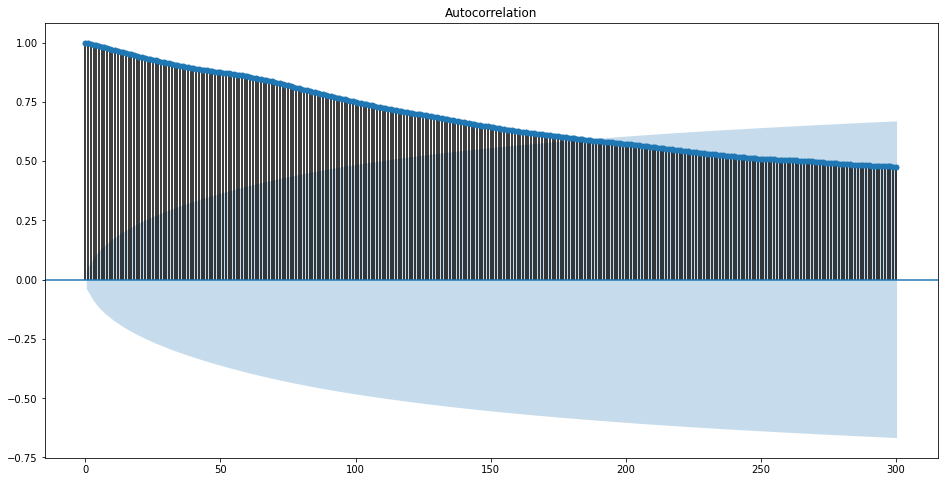

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8

series = df.set_index('Date')
fig = plot_acf(series, lags=300)